# DEEP LEARNING WITH PYTHON
## _FROM TABULAR TO MULTIMEDIA_

### UniFr Winter School in Data Analytics & Machine Learning
Fribourg, 14-16 February 2024

with [Christian Kauth](https://www.linkedin.com/in/ckauth/)

https://arxiv.org/abs/2010.11929

## Installations

In [ ]:
! pip install -qq datasets transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


# Data
- Emotions in Tweets: https://huggingface.co/datasets/emotion
- Movie Reviews: [IMDB](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

## Train, Valid, Test

In [ ]:
from datasets import load_dataset

#raw_datasets = load_dataset("emotion")
raw_datasets = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

## Labels

In [ ]:
print(raw_datasets['train'].features)
num2label = {i: n for i, n in enumerate(raw_datasets['train'].features['label'].names)} # just assigning dictionary values to neg and pos
label2num = {v: k for k, v in num2label.items()}

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}


## Samples 👀

In [ ]:
import random

for _ in range(10):
  idx = random.randint(0, raw_datasets['train'].num_rows -1)
  text = raw_datasets['train']['text'][idx]
  label = num2label[raw_datasets['train']['label'][idx]]
  print(f"{text}\n-> {label}\n")

This work is striking in its accurate depiction of teenage life at the time of its execution. Though this is a broad generalization, parents of that time were too self-absorbed to be real parents, and those who were home tended to be far too distracted from the real issues, where their children were concerned. <br /><br />This film teaches us how to let go, even when it is painful, and does so with a sweet, melancholy, but informed style whereby Foster talks philosophically about feeling the pain of life. I loved that scene. It was my favorite scene in the movie, actually.<br /><br />The transition from funeral to wedding was meant to show that life does go on, and so must we. Baio's skateboarding through a pack of goons and outrunning them was meant to show us that the troubled times will pass, and we are meant to get through them, to better times.<br /><br />The whole metaphor of "moving on," and the procession of life, is present throughout the film, and serves to give us hope, in t

## Class Distribution

In [ ]:
num2label

{0: 'neg', 1: 'pos'}

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


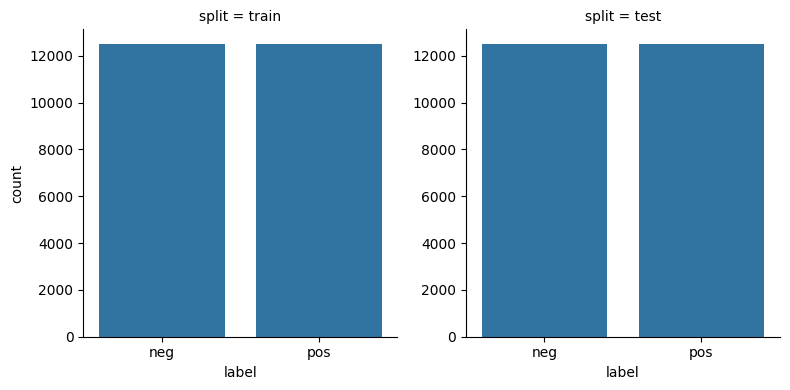

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

label_counts = []
for split in raw_datasets.keys():
  try:
    unique, counts = np.unique(raw_datasets[split]['label'], return_counts=True)
    label_counts.extend([(split, num2label[u], c) for u, c in zip(unique, counts)])
  except:
    pass

df_counts = pd.DataFrame.from_records(label_counts, columns=['split', 'label', 'count'])
g = sns.FacetGrid(df_counts, col='split', sharey=False, height=4)
g.map(sns.barplot, 'label', 'count')

# Bag Of Words
the working horse until 2015

<img src="https://images.unsplash.com/photo-1591508240323-d86a21946c30?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2412&q=80" width="1000px"/>

## Tokenization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10_000)
vectorizer.fit(raw_datasets['train']['text'])

X, y = dict(), dict()
for split in raw_datasets.keys():
  X[split] = vectorizer.transform(raw_datasets[split]['text'])
  y[split] = raw_datasets[split]['label']

In [ ]:
X['train']

<25000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 3170882 stored elements in Compressed Sparse Row format>

In [ ]:
len(vectorizer.get_feature_names_out())

10000

In [ ]:
idx = 1
print(raw_datasets['train'][idx])
print(X['train'][idx])
print(vectorizer.inverse_transform(X['train'][idx]))

{'text': '"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, 

## Training

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = [('bayes', GaussianNB()),
         ]# ('knn', KNeighborsClassifier())]

for model_name, model in models:
  model.fit(X['train'].toarray(), y['train'])
  print(f"{model_name}: {model.score(X['test'].toarray(), y['test'])}")

bayes: 0.64976
CPU times: user 5.6 s, sys: 4.72 s, total: 10.3 s
Wall time: 10.7 s


## Tf-idf

<img src="http://3.bp.blogspot.com/-u928a3xbrsw/UukmRVX_JzI/AAAAAAAAAKE/wIhuNmdQb7E/s1600/td-idf-graphic.png" width="600px" />

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10_000)
vectorizer.fit(raw_datasets['train']['text'])

X, y = dict(), dict()
for split in raw_datasets.keys():
  X[split] = vectorizer.transform(raw_datasets[split]['text'])
  y[split] = raw_datasets[split]['label']

In [ ]:
idx = 1
print(raw_datasets['train'][idx])
print(X['train'][idx])
print(vectorizer.inverse_transform(X['train'][idx]))

{'text': '"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, 

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = [('bayes', GaussianNB()),
         ] #('knn', KNeighborsClassifier())]

for model_name, model in models:
  model.fit(X['train'].toarray(), y['train'])
  print(f"{model_name}: {model.score(X['test'].toarray(), y['test'])}")

bayes: 0.71596
CPU times: user 4.87 s, sys: 5.86 s, total: 10.7 s
Wall time: 10.7 s


## N-grams

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10_000,
                             ngram_range=(1,2))

vectorizer.fit(raw_datasets['train']['text'])

X, y = dict(), dict()
for split in raw_datasets.keys():
  X[split] = vectorizer.transform(raw_datasets[split]['text'])
  y[split] = raw_datasets[split]['label']

In [ ]:
idx = 1
print(raw_datasets['train'][idx])
print(X['train'][idx])
print(vectorizer.inverse_transform(X['train'][idx]))

{'text': '"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn\'t matter what one\'s political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn\'t true. I\'ve seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don\'t exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we\'re treated to the site of Vincent Gallo\'s throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, 

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = [('bayes', GaussianNB()),
         ] #('knn', KNeighborsClassifier())]

for model_name, model in models:
  model.fit(X['train'].toarray(), y['train'])
  print(f"{model_name}: {model.score(X['test'].toarray(), y['test'])}")

bayes: 0.83924
CPU times: user 5.05 s, sys: 5.85 s, total: 10.9 s
Wall time: 10.9 s


## Assessment

In [ ]:
from sklearn.metrics import confusion_matrix

model = GaussianNB()
model.fit(X['train'].toarray(), y['train'])
y_pred = list(model.predict(X['test'].toarray()))

cm = confusion_matrix(y['test'], y_pred)
df = pd.DataFrame(cm,
                  index=num2label.values(),
                  columns=num2label.values())
df

neg    pos
neg  10710   1790
pos   2229  10271

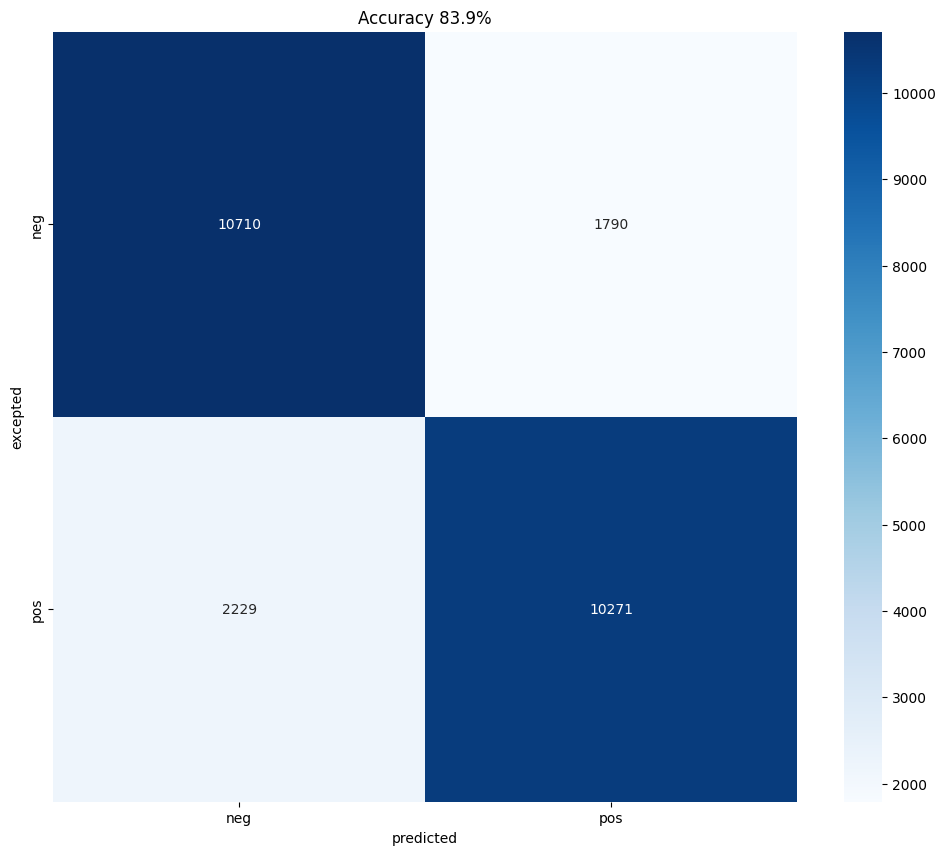

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df,
            annot=True,
            fmt='0',
            cmap='Blues',
            ax=ax)
ax.set_ylabel('excepted')
ax.set_xlabel('predicted')
ax.set_title(f'Accuracy {sum(np.diag(cm)) / sum(sum(cm)) * 100:.1f}%')
plt.show()

# Embeddings & Recurrent NN
2015 - 2018

## Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

vocab_size = 10_000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(raw_datasets['train']['text'])

tokenized_datasets = {}
for split in raw_datasets.keys():
  try:
    tokenized_datasets[split] = {'text': tokenizer.texts_to_sequences(raw_datasets[split]['text']),
                                'label': to_categorical(raw_datasets[split]['label'])}
  except:
    tokenized_datasets[split] = {'text': tokenizer.texts_to_sequences(raw_datasets[split]['text']),
                                 'label': None}

word_index = tokenizer.word_index
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'if': 44,
 'has': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [ ]:
from tensorflow.keras.preprocessing import sequence

max_len = 100

padded_datasets = {
    split: {'text': sequence.pad_sequences(tokenized_datasets[split]['text'], maxlen=max_len),
            'label': tokenized_datasets[split]['label']}
    for split in raw_datasets.keys()
}

In [ ]:
idx = 1
print(raw_datasets['train'][idx]['text'])
print(padded_datasets['train']['text'][idx])
print(tokenizer.sequences_to_texts([tokenized_datasets['train']['text'][idx]]))

"I Am Curious: Yellow" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we're treated to the site of Vincent Gallo's throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) "double-standard" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, and the same cann

## GloVe

Embeddings for words are changing with proper nouns and they will not all exist in word embedding models!

In [ ]:
%%html
<iframe src="https://nlp.stanford.edu/projects/glove/" width="1000" height="600"></iframe>

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-02-15 15:02:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-02-15 15:02:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-02-15 15:02:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], "float32")
    embeddings_dict[word] = vector

In [ ]:
from scipy.spatial.distance import euclidean

def find_closest_embeddings(embedding):
  return sorted(embeddings_dict.keys(),
                key=lambda word: euclidean(embeddings_dict[word], embedding))

find_closest_embeddings(embeddings_dict["language"])[:10]

['language',
 'languages',
 'word',
 'spoken',
 'vocabulary',
 'translation',
 'refers',
 'arabic',
 'phrase',
 'terminology']

In [ ]:
triplets = [('man', 'boy', 'girl'),
            ('twig', 'branch', 'hand'),
            ('france', 'paris', 'bern')]

for t in triplets:
  match = find_closest_embeddings(embeddings_dict[t[0]]\
                                  - embeddings_dict[t[1]]\
                                  + embeddings_dict[t[2]])[:3]

  print(f"{t[0]} - {t[1]} + {t[2]} ≈ {match}")

man - boy + girl ≈ ['woman', 'man', 'girl']
twig - branch + hand ≈ ['fingernails', 'toenails', 'stringy']
france - paris + bern ≈ ['bern', 'magdeburg', 'switzerland']


## Token Embedding

In [ ]:
emb_dim = 50
embedding_matrix = np.zeros((vocab_size, emb_dim))
oov_count = 0

for word, idx in word_index.items():
  if idx < vocab_size:
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
      embedding_matrix[idx] = embedding_vector
    else:
      oov_count += 1

print(f'{oov_count} words are out of vocabulary')

201 words are out of vocabulary


## LSTM

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

num_labels = raw_datasets['test'].features['label'].num_classes

def lstm():
  model = keras.Sequential([
      layers.Embedding(vocab_size, emb_dim, trainable = False, weights=[embedding_matrix]),
      layers.LSTM(128, return_sequences=False),
      layers.Dropout(0.5),
      layers.Dense(num_labels, activation = 'softmax')])

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())

  return model

lstm()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          500000    
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 591906 (2.26 MB)
Trainable params: 91906 (359.01 KB)
Non-trainable params: 500000 (1.91 MB)
_________________________________________________________________
None


In [ ]:
padded_datasets.keys()

dict_keys(['train', 'test', 'unsupervised'])

In [ ]:
%%time
model = lstm()
batch_size = 256
epochs  = 100

early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0,
    patience=10,
    restore_best_weights=True,
)

history = model.fit(padded_datasets['train']['text'],
                    np.asarray(padded_datasets['train']['label']),
                    validation_data=(padded_datasets['test']['text'],
                                     np.asarray(padded_datasets['test']['label'])),
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          500000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 591906 (2.26 MB)
Trainable params: 91906 (359.01 KB)
Non-trainable params: 500000 (1.91 MB)
_________________________________________________________________
None
Epoch 1/100
98/98 [==============================] - 8s 22ms/step - loss: 0.5942 - accuracy: 0.6775 - val_loss: 0.5361 - val_accuracy: 0.7302

# Pretrained Transformer

<img src="https://media.istockphoto.com/id/517580133/photo/robot-transform.jpg?s=612x612&w=0&k=20&c=g8AJP0jmPyNFhHU-B83TxI28LlLw8YjLa7dqUhr9X-U=" width="600px"/>

## Distilbert

https://huggingface.co/distilbert-base-uncased

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

## Tokenizer

In [ ]:
checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
idx = 3
print(tokenizer.tokenize(raw_datasets['train'][idx]['text']))
tokenizer(raw_datasets['train'][idx]['text'])

['this', 'film', 'was', 'probably', 'inspired', 'by', 'god', '##ard', "'", 's', 'mas', '##cu', '##lin', ',', 'fe', '##mini', '##n', 'and', 'i', 'urge', 'you', 'to', 'see', 'that', 'film', 'instead', '.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'the', 'film', 'has', 'two', 'strong', 'elements', 'and', 'those', 'are', ',', '(', '1', ')', 'the', 'realistic', 'acting', '(', '2', ')', 'the', 'impressive', ',', 'und', '##ese', '##r', '##ved', '##ly', 'good', ',', 'photo', '.', 'apart', 'from', 'that', ',', 'what', 'strikes', 'me', 'most', 'is', 'the', 'endless', 'stream', 'of', 'si', '##llin', '##ess', '.', 'lena', 'ny', '##man', 'has', 'to', 'be', 'most', 'annoying', 'actress', 'in', 'the', 'world', '.', 'she', 'acts', 'so', 'stupid', 'and', 'with', 'all', 'the', 'nu', '##dity', 'in', 'this', 'film', ',', '.', '.', '.', 'it', "'", 's', 'una', '##tt', '##ractive', '.', 'comparing', 'to', 'god', '##ard', "'", 's', 'film', ',', 'intellectual', '##ity', 'has', 'been', 'replaced', 'with', 'stu

{'input_ids': [101, 2023, 2143, 2001, 2763, 4427, 2011, 2643, 4232, 1005, 1055, 16137, 10841, 4115, 1010, 10768, 25300, 2078, 1998, 1045, 9075, 2017, 2000, 2156, 2008, 2143, 2612, 1012, 1026, 7987, 1013, 1028, 1026, 7987, 1013, 1028, 1996, 2143, 2038, 2048, 2844, 3787, 1998, 2216, 2024, 1010, 1006, 1015, 1007, 1996, 12689, 3772, 1006, 1016, 1007, 1996, 8052, 1010, 6151, 6810, 2099, 7178, 2135, 2204, 1010, 6302, 1012, 4237, 2013, 2008, 1010, 2054, 9326, 2033, 2087, 2003, 1996, 10866, 5460, 1997, 9033, 21202, 7971, 1012, 14229, 6396, 2386, 2038, 2000, 2022, 2087, 15703, 3883, 1999, 1996, 2088, 1012, 2016, 4490, 2061, 5236, 1998, 2007, 2035, 1996, 16371, 25469, 1999, 2023, 2143, 1010, 1012, 1012, 1012, 2009, 1005, 1055, 14477, 4779, 26884, 1012, 13599, 2000, 2643, 4232, 1005, 1055, 2143, 1010, 7789, 3012, 2038, 2042, 2999, 2007, 28072, 1012, 2302, 2183, 2205, 2521, 2006, 2023, 3395, 1010, 1045, 2052, 2360, 2008, 4076, 2013, 1996, 4489, 1999, 15084, 2090, 1996, 2413, 1998, 1996, 4467, 2554

In [ ]:
def tokenize_dataset(dataset):
    encoded = tokenizer(
        dataset['text'],
        padding=True,
        truncation=True,
        return_tensors='np',
    )
    return encoded.data

tokenized_datasets = {
    split: tokenize_dataset(raw_datasets[split]) for split in raw_datasets.keys()
}

In [ ]:
tokenized_datasets['test']

## Model

In [ ]:
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint,
                                                             num_labels = raw_datasets['test'].features['label'].num_classes)

## Training

### Optimizer

In [ ]:
batch_size = 16
num_epochs = 1

num_train_steps = (len(tokenized_datasets['train']['input_ids']) // batch_size) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5,
    end_learning_rate=0.,
    decay_steps=num_train_steps
    )

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=lr_scheduler)

### Loss

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss,  metrics=['accuracy'])

### Train

In [ ]:
%%time
model.fit(
    tokenized_datasets['train'],
    np.array(raw_datasets['train']['label']),
    #validation_data=(tokenized_datasets['validation'], np.array(raw_datasets['validation']['label'])),
    validation_data=(tokenized_datasets['test'], np.array(raw_datasets['test']['label'])),
    batch_size=batch_size,
    epochs=num_epochs
)

## Assessment

In [ ]:
y_pred = model.predict(tokenized_datasets['test'])
y_pred = np.argmax(y_pred.logits, axis=-1)

cm = confusion_matrix(y['test'], y_pred)
df = pd.DataFrame(cm,
                  index=num2label.values(),
                  columns=num2label.values())
df

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df,
            annot=True,
            fmt='0',
            cmap='Blues',
            ax=ax)
ax.set_ylabel('excepted')
ax.set_xlabel('predicted')
ax.set_title(f'Accuracy {sum(np.diag(cm)) / sum(sum(cm)) * 100:.1f}%')
plt.show()

## Deployment

In [ ]:
!pip install -q gradio

In [ ]:
tweet = random.choice(raw_datasets['test']['text'])
tokenized_tweet = tokenizer(tweet, return_tensors='np')
tokenized_tweet
model.predict(tokenized_tweet['input_ids'])

In [ ]:
import gradio as gr


def extract_sentiment(tweet):
  tokenized_tweet = tokenizer(tweet, return_tensors='np')
  logits = model.predict(tokenized_tweet['input_ids'])
  prob = tf.nn.softmax(logits['logits'], axis=None)[0].numpy()
  confidences = {num2label[i]: float(prob[i]) for i in range(len(prob))}
  return confidences


demo = gr.Interface(fn=extract_sentiment,
                    inputs='text',
                    outputs=gr.Label(num_top_classes=3),
                    examples=[random.choice(raw_datasets['test']['text']) for _ in range(10)])

demo.launch()

# UP NEXT

[Transformers](https://colab.research.google.com/drive/14XB4wbvr05Q4AVsd9wqsv9_3DGYVqVVk?usp=sharing)